In [1]:
import bottleneck as bn
import matplotlib
import matplotlib.dates as mdates
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scienceplots
import scipy
import scipy.signal
import scipy.special
import scipy.stats
import sklearn.decomposition
import astropy.io
import datetime
import astropy.time
import pandas as pd

from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])

figsize_short = (8, 4)
figsize_normal = (8, 6)
figsize_tall = (8, 8)
plt.rcParams['figure.figsize'] = figsize_short
plt.rcParams['axes.labelpad'] = 6.0
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.edgecolor'] = 'none'


title_font = {'fontsize': 16, 'weight': 'bold', 'style': 'italic'}
path_effect = [pe.withStroke(linewidth=2.0, foreground="k")]

read_path = 'docs/Data/'
save_path = 'docs/Figure/'

perula_df = pd.read_csv(read_path + 'matlab_perula.txt', header = None, sep = '\s+')
matlab_perula = matplotlib.colors.LinearSegmentedColormap.from_list('matlab_perula', np.array(perula_df))

jet_df = pd.read_csv(read_path + 'matlab_jet.txt', header = None, sep = '\s+')
matlab_jet = matplotlib.colors.LinearSegmentedColormap.from_list('matlab_jet', np.array(jet_df))

%matplotlib ipympl

<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_25804\3118345031.py:41: SyntaxWarning: invalid escape sequence '\s'
  perula_df = pd.read_csv(read_path + 'matlab_perula.txt', header = None, sep = '\s+')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_25804\3118345031.py:44: SyntaxWarning: invalid escape sequence '\s'
  jet_df = pd.read_csv(read_path + 'matlab_jet.txt', header = None, sep = '\s+')


cmor0.073-1.0


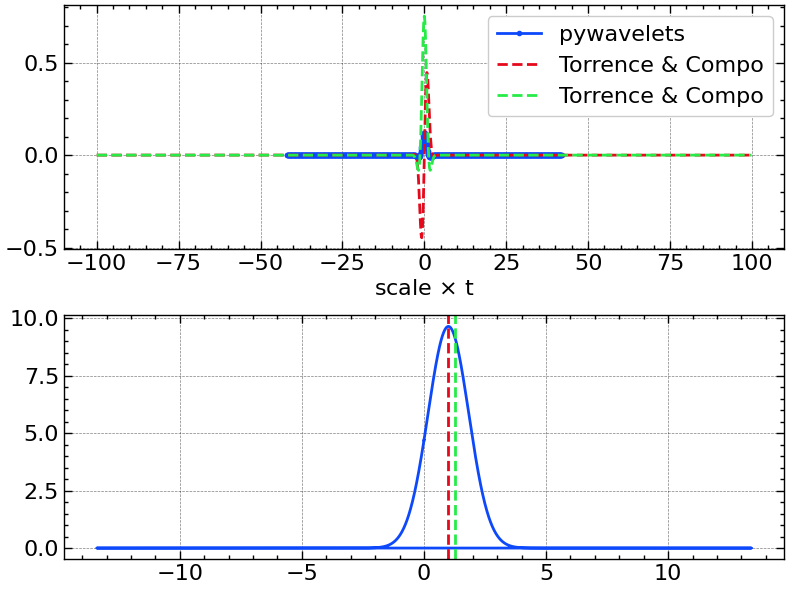

In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])
%matplotlib ipympl

plt.close()
plt.figure(figsize = (8, 6))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

eta = np.linspace(-2, 2, 2 ** 10, endpoint=False)
deta = eta[1] - eta[0]
omega0 = 1.2

B, C = 2 * (omega0 / 2 / np.pi) ** 2, 1.0
print(f"cmor{B:.3f}-{C:.1f}")
[psi, x] = pywt.ContinuousWavelet(f"cmor{B:.2f}-{C:.1f}").wavefun(10)

ax1.plot(x * np.sqrt(2 / B), np.real(psi) / np.sqrt((psi.real ** 2).sum()) * (B / 2) ** 0.25, 'o-', label = 'pywavelets')

x = np.linspace(-100, 100, 2 ** 10, endpoint=False)
dx = x[1] - x[0]
psi_r = (np.pi ** -0.25) * np.exp(-x * x / 2) * np.cos( omega0 * x)
psi_i = (np.pi ** -0.25) * np.exp(-x * x / 2) * np.sin( omega0 * x)
psi = psi_r + 1j * psi_i
# psi -= np.mean(psi)
# psi /= np.sqrt(np.sum(psi ** 2))

ax1.plot(x, psi_i, '--', label = 'Torrence & Compo')
ax1.plot(x, psi_r, '--', label = 'Torrence & Compo')

n = psi.size
n = 2 ** 16
ax2.plot((np.fft.fftfreq( n = n, d = dx)) / (omega0 / 2 / np.pi), np.abs(np.fft.fft(psi, n = n)))

ax2.axvline( 1, color='C1', linestyle='--', label='Fourier Frequency')
ax2.axvline( (omega0 + np.sqrt(2 + omega0 ** 2)) / (2 * omega0), color='C2', linestyle='--', label='Fourier Frequency')

# ax2.plot((ssqueezepy.Wavelet(('morlet', {'mu': 6.0})).xifn()), (np.abs(ssqueezepy.Wavelet(('morlet', {'mu': 6.0})).psifn())))
# ax2.set_xlim(0.0, 2.0)

ax1.legend()
# ax1.plot(, 'C0o-')
ax1.set_xlabel(r'scale $\times$ t')
plt.tight_layout()
plt.show()

In [3]:
from scipy.optimize import brentq

def transcendental_eq(x, omega0):
    # 2 x^2 (1 - e^{-omega0 x}) - 2 omega0 x - 1 + e^{-omega0 x} = 0
    return 2*x**2*(1 - np.exp(-omega0*x)) \
           - 2*omega0*x \
           - 1 \
           + np.exp(-omega0*x)

omega0 = 10.0   # 举例
# 估计主根落在 x ≈ sqrt(3/2) ≈ 1.22 附近，我们选 [0.1, 5] 作为搜索区间
x_root = brentq(transcendental_eq, np.sqrt(1.5), (np.sqrt(omega0 ** 2 + 2) + omega0) / 1, args=(omega0,), xtol = 1e-12)

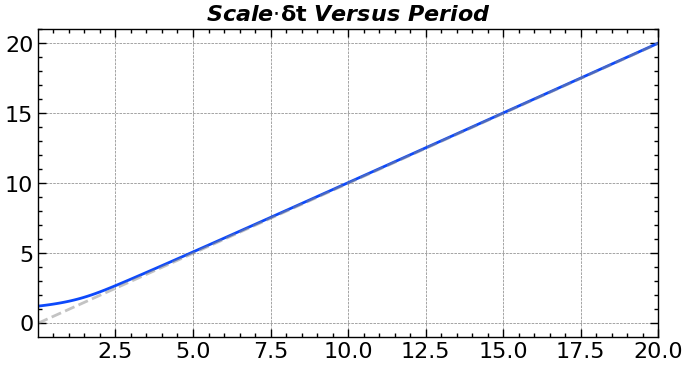

In [70]:
omega0 = np.geomspace(0.01, 20, 100)
x0 = np.zeros_like(omega0)
for idx in range(len(omega0)):
    x0[idx] = brentq(transcendental_eq, np.sqrt(1.5), (np.sqrt(omega0[idx] ** 2 + 2) + omega0[idx]) / 1, args=(omega0[idx],), xtol = 1e-12)

plt.close()
ax1 = plt.subplot()

ax1.plot(omega0, x0, )
ax1.plot(omega0, omega0, '#888888', alpha = 0.5)

# def x_approx(omega0):
#     f = np.log(omega0)
#     return (omega0 + np.sqrt(1.5) * f) / (1.0 + f)

# ax1.plot(omega0, x_approx(omega0))
# ax1.set_ylim(0, 1.2)
# ax1_twinx = ax1.twinx()
# ax1_twinx.plot(omega0, 1 - omega0 / x0, 'C1--')
# ax1_twinx.set_ylim(0, 1.0)
# ax1.axvspan(omega0[(x0 / omega0 < 1.05)][0], omega0[-1], color = '#888888', alpha = 0.5)
ax1.set_title(r'Scale$\cdot\mathbf{\delta t}$ Versus Period', **title_font)
# ax1.set_xscale('log')
ax1.autoscale(axis = 'x', tight=True)

plt.show()

4.91649216460117


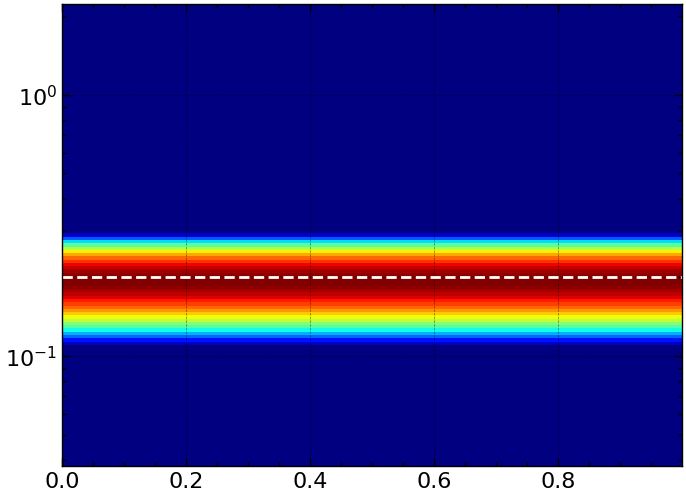

In [93]:
import matplotlib.colors
N = 2 ** 14
t = np.linspace(0, 1, N, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
padtyle = None
omega = 5.0 * 2 * np.pi
sig_cos = np.cos(omega * t)
sig_sin = np.sin(omega * t)

omega0 = .2
mu = omega0
scales = np.geomspace(2 ** 7, 2 ** 13, 12 * 12, endpoint = False)[:-3]
# scales = np.geomspace(2 ** 1, 2 ** 13, 12 * 12, endpoint = False)[:-3]

import ssqueezepy
coef_cos, _ = ssqueezepy.cwt(sig_cos, ('morlet', {'mu': mu}), scales = scales.astype(np.float32), fs = fs, l1_norm = False, padtype = padtyle)
coef_sin, _ = ssqueezepy.cwt(sig_sin, ('morlet', {'mu': mu}), scales = scales.astype(np.float32), fs = fs, l1_norm = False, padtype = padtyle)

plt.close()
ax1 = plt.subplot(1, 1, 1)

scale_to_period = 4 * np.pi / (mu + np.sqrt(2 + mu ** 2))

x0 = brentq(transcendental_eq, np.sqrt(1.5), (np.sqrt(omega0 ** 2 + 2) + omega0) / 1, args=(omega0,), xtol = 1e-12)
scale_to_period = 2 * np.pi / x0

print(scale_to_period)
period = scale_to_period * scales * dt

power = np.abs(coef_cos) ** 2 + np.abs(coef_sin) ** 2
ax1.pcolormesh(t, period, power, cmap = 'jet', norm = matplotlib.colors.LogNorm(vmax = np.max(power), vmin = np.max(power) / 2), zorder = -1)
ax1.axhline(2 * np.pi / omega, color='w', linestyle='--', label='Fourier Frequency')

ax1.set_yscale('log')

plt.show()

In [ ]:
pywt.scal2frq(scale = 1.0, wavelet = f"cmor{B:.2f}-{C:.1f}")

np.float64(0.5)